In [151]:
#https://api.got.show/api/characters/locations

In [152]:
seasons1 = "http://www.avclub.com/tv/game-of-thrones-newbies/?season=1"
seasons2 = "http://www.avclub.com/tv/game-of-thrones-newbies/?season=2"
seasons3 = "http://www.avclub.com/tv/game-of-thrones-newbies/?season=3"
seasons4 = "http://www.avclub.com/tv/game-of-thrones-newbies/?season=4"
seasons5 = "http://www.avclub.com/tv/game-of-thrones-newbies/?season=5"
seasons6 = "http://www.avclub.com/tv/game-of-thrones-newbies/?season=6"

In [153]:
import urllib2, json

baseurl="http://www.avclub.com/tvclub/bloodbath-wraps-second-act-game-thrones-newbies-238792"
query = "%s" % (baseurl)
response = urllib2.urlopen(query)
source = response.read()
#d = json.loads(source)

In [154]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
%matplotlib inline


def containsDigit(s):
    try:
        for a in str(s):
            if a.isdigit():
                return True
    # workaround for unicode issues
    except UnicodeEncodeError:
        return True
    return False

def cleanText(episode):
    return [x.lower() for x in episode if x.lower() not in stopwords.words('english') and True not in [t in string.punctuation for t in x] and not containsDigit(x)]

wordlist = dict()
for i, line in enumerate(open('DataSetS1.txt', 'r')):
    if i > 3:
        data = line.strip().split('\t')
        # read the word and happiness_avg into a dict.
        wordlist[data[0].lower()] = float(data[2])
        
def calcSentiment(tokens):
    sentiment = 0.0
    for token in tokens:
        t = token.lower()
        if t in wordlist:
            sentiment += wordlist[t]
    sentiments = sentiment / len(tokens)
    return sentiments

#     for window_length in window_lengths:
#         x, y = calcSentiment(text, window_length)
#         xs.append(x)
#         ys.append(y)
    # Create a plot of the four different window lengths
#     f, axa = plt.subplots(1, 4, sharey=True, figsize=(20,5))
#   st = plt.suptitle("Text: {0}".format(text.name), fontsize=18); 
#     axa[0].set_xlabel('Text position')
#     axa[0].set_ylabel('Sentiment')
#     for i in range(len(xs)):
#         axa[i].plot(xs[i], ys[i], '-', color=colors[i])
#         axa[i].set_title("Window length: {0}".format(window_lengths[i]))
#         axa[i].set_xlim(0, (max(xs[i]) + max(xs[i]) / 40))
#     axa[0].plot(xs[0], ys[0], '-', color='b')
#     axa[0].set_xlim(0, (max(xs[0]) + max(xs[0]) / 40))
#     f.subplots_adjust(wspace=.05)
#    st.set_y(1)
#     f.show()

In [155]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(source)
article = soup.find_all('section', {'class':"article-text"})[0].text
# t = nltk.word_tokenize(article.lower())

In [156]:
from bs4 import BeautifulSoup
import urllib2, json

# baseurl="http://www.avclub.com/tv/game-of-thrones-newbies/"
# query = "%s" % (baseurl)
# response = urllib2.urlopen(query)
# source = response.read()

# soup = BeautifulSoup(source, from_encoding=response.info().getparam('charset'))

def getSeasons():
    url = "http://www.avclub.com"
    result = []
    baseurl="http://www.avclub.com/tv/game-of-thrones-newbies/?season=1"
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    source = response.read()

    soup = BeautifulSoup(source, from_encoding=response.info().getparam('charset'))
    
    for link in soup.find_all('a', href=True):
        if 'season' in link['href']:
            result.append(url + link['href'])
    return result

def getReviews(baseurl):
    print baseurl
    url = "http://www.avclub.com"
    result = []
#    baseurl="http://www.avclub.com/tv/game-of-thrones-newbies/?season=1"
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    source = response.read()

    soup = BeautifulSoup(source, from_encoding=response.info().getparam('charset'))

    for link in soup.find_all('a', href=True):
        if link.has_attr('title'):
            if 'Game Of Thrones (newbies)' in link['title']:
                result.append(url + link['href'])
                
    print len(result[1:])
    return result[1:]

def getReview(baseurl):
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    
    source = response.read()

    soup = BeautifulSoup(source)
    article = soup.find_all('section', {'class':"article-text"})[0].text
    return article

data = []
for season in getSeasons():
    reviews = getReviews(season)
    for review in reviews:
        if 'mountain-and-viper' in review:
            print review
            data.append(getReview("http://www.avclub.com/tvclub/game-thrones-newbies-laws-gods-and-men-204527"))
            data.append(getReview("http://www.avclub.com/tvclub/game-thrones-newbies-mockingbird-204801"))
        data.append(getReview(review))
        
print 'donesie onesie'

http://www.avclub.com/tv/game-of-thrones-newbies/?season=6
10
http://www.avclub.com/tv/game-of-thrones-newbies/?season=5
10
http://www.avclub.com/tv/game-of-thrones-newbies/?season=4
8
http://www.avclub.com/tvclub/game-thrones-newbies-mountain-and-viper-205256
http://www.avclub.com/tv/game-of-thrones-newbies/?season=3
10
http://www.avclub.com/tv/game-of-thrones-newbies/?season=2
10
http://www.avclub.com/tv/game-of-thrones-newbies/?season=1
6
donesie onesie


In [157]:
# Remove the 'stray observations' section from each article
d1 = data
for index, a in enumerate(d1):
    d1[index] = a.split('Stray observations')[0]
#d = list(reversed(d))
print len(d1)

56


In [158]:
colors = ['g','b','y','r']
# For each of the novels, calculate the sentiment profile.
sentimentscores1 = []
for i, text in enumerate(d1):
#     xs = list()
    ys = list()
    y = calcSentiment(text)
    sentimentscores1.append(y)
    ys.append(y)

56 56


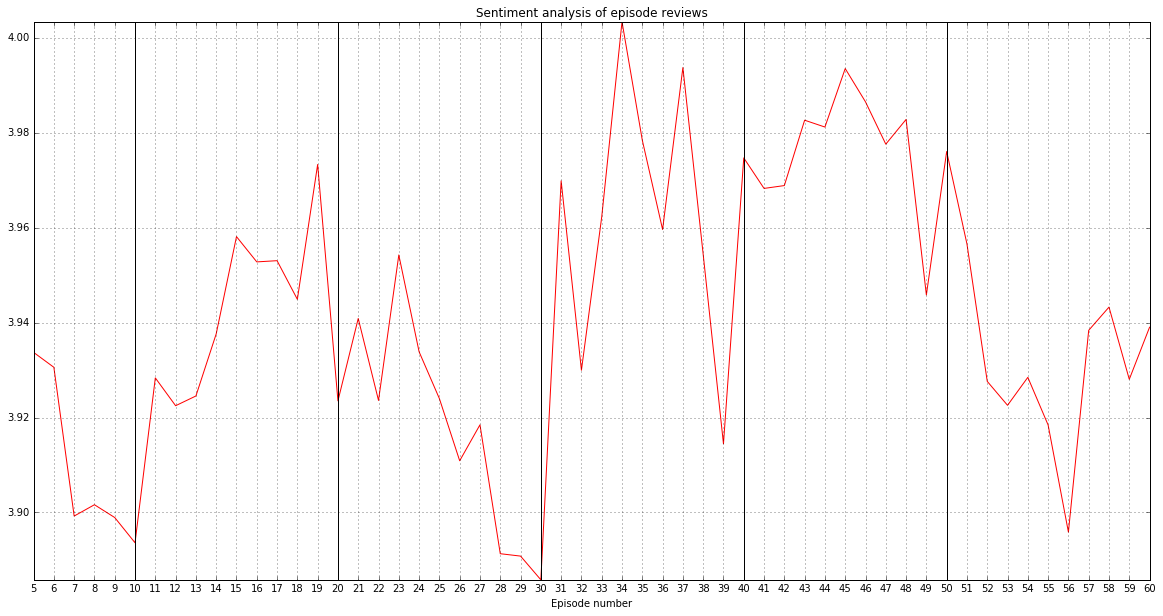

In [159]:
senti = list(reversed(sentimentscores1))
l = range(5, 61)
print len(senti), len(l)
plt.figure(figsize=(20,10))
plt.plot(l, senti, '-', color='r')
plt.plot((10, 10), (min(senti), max(senti)), 'k-')
plt.plot((20, 20), (min(senti), max(senti)), 'k-')
plt.plot((30, 30), (min(senti), max(senti)), 'k-')
plt.plot((40, 40), (min(senti), max(senti)), 'k-')
plt.plot((50, 50), (min(senti), max(senti)), 'k-')
plt.xticks(l)
plt.xlim(5, 60)
plt.ylim(min(senti), max(senti))
plt.grid(True)
plt.xlabel('Episode number')
plt.title("Sentiment analysis of episode reviews")

In [160]:
import requests
from bs4 import BeautifulSoup
import urllib2, json

# baseurl="http://www.avclub.com/tv/game-of-thrones-newbies/"
# query = "%s" % (baseurl)
# response = urllib2.urlopen(query)
# source = response.read()

# soup = BeautifulSoup(source, from_encoding=response.info().getparam('charset'))

def getSeason(season=1):
    result = []
    url = "http://genius.com/albums/Game-of-thrones/Season-" + str(season) + "-scripts"

    soup = BeautifulSoup(requests.get(url).text)
    
    for link in soup.find_all('a', href=True):
        if 'annotated' in link['href'] and 'Game-of-thrones' in link['href'] and 'preview' not in link['href']:
            result.append(link['href'])
    return result

def getScript(url):

    soup = BeautifulSoup(requests.get(url).text)
    
    return soup.find_all('lyrics', {'class':"lyrics"})[0].text




def getTranscript(url):
    soup = BeautifulSoup(requests.get(url).text)
    print soup
#    print soup.find_all('div', {'class':"postbody"})[0].text

def getEpisodeFromFile(season, episode):
    data = ""
    with open('got/' + str(season) + '_' + str(episode) + '.txt', 'r') as myfile:
        data = myfile.read().replace('\n', '')
    return data

d2 = []
for season in [1,4,5,6]:
    if season == 4:
        for s in range(2,4):
            for e in range(1,11):
                d2.append(getEpisodeFromFile(s, e))
    s = getSeason(season=season)
    for episode in s:
        d2.append(getScript(episode))
    
print 'donesie onesie'

donesie onesie


In [161]:
colors = ['g','b','y','r']
# For each of the novels, calculate the sentiment profile.
sentimentscores2 = []
for i, text in enumerate(d2):
#     xs = list()
    ys = list()
    y = calcSentiment(text)
    sentimentscores2.append(y)
    ys.append(y)
print "done"

done


60 60


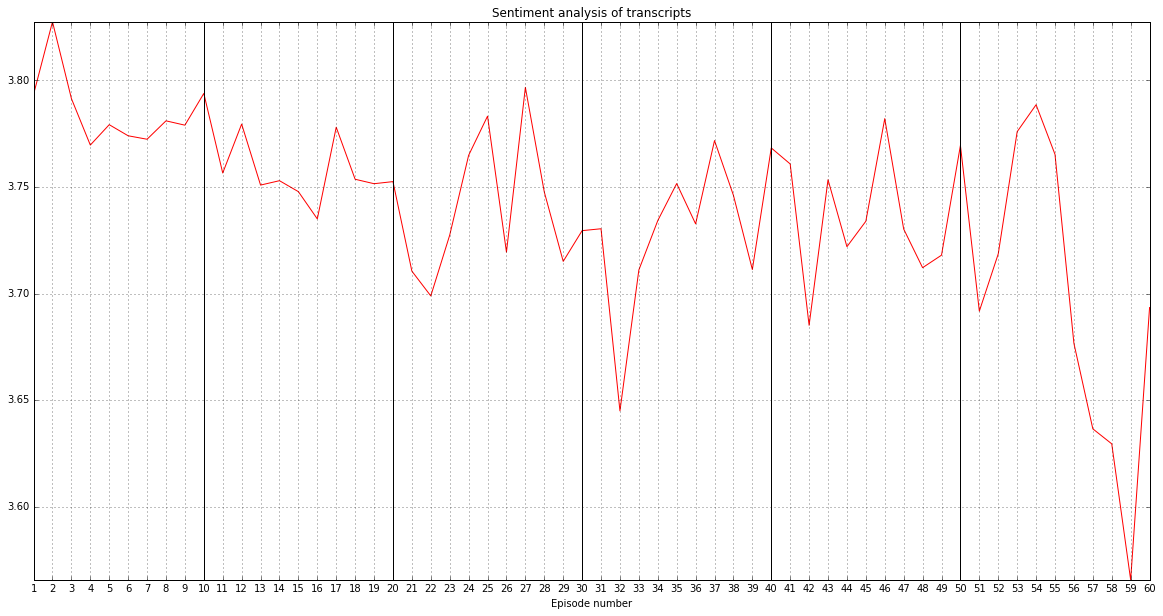

In [162]:
senti = list(reversed(sentimentscores2))
l = range(1, 61)
print len(senti), len(l)
plt.figure(figsize=(20,10))
plt.plot(l, senti, '-', color='r')
plt.plot((10, 10), (min(senti), max(senti)), 'k-')
plt.plot((20, 20), (min(senti), max(senti)), 'k-')
plt.plot((30, 30), (min(senti), max(senti)), 'k-')
plt.plot((40, 40), (min(senti), max(senti)), 'k-')
plt.plot((50, 50), (min(senti), max(senti)), 'k-')
plt.xticks(l)
plt.xlim(1, 60)
plt.ylim(min(senti), max(senti))
plt.grid(True)
plt.xlabel('Episode number')
plt.title("Sentiment analysis of transcripts")

In [163]:
print ys

[3.7934805494286463]


In [164]:
import urllib2, json

baseurl="https://api.got.show/api/characters/paths"
query = "%s" % (baseurl)
response = urllib2.urlopen(query)
source = response.read()
d = json.loads(source)

In [165]:
d[0]

{u'__v': 0,
 u'_id': u'56ffc726aa02d99219e06110',
 u'name': u'Eddard Stark',
 u'path': [{u'alive': True,
   u'from': 1,
   u'path': [[78.60937753613514, -105.31330572428169, u'Winterfell'],
    [78.87133549569842, -104.35496490808343, u'Holdfast'],
    [78.60937753613514, -105.31330572428169, u'Winterfell']],
   u'to': 2},
  {u'alive': True,
   u'from': 2,
   u'path': [[78.60937753613514, -105.31330572428169, u'Winterfell'],
    [78.26209183448897, -104.06745472665963],
    [77.95071659611816, -103.18901250924476],
    [77.8401938026893, -103.96204166056982],
    [77.61614450621268, -104.10259241535623],
    [77.33421454748652, -104.80534618928812],
    [77.15578831849741, -104.77020850059152],
    [76.82356825529133, -105.54323765191658],
    [76.6543068480568, -105.57837534061318],
    [76.45002022211, -105.15672307625407],
    [76.17565758388399, -105.12158538755747],
    [75.98973039777916, -104.66479543450174],
    [75.47011578713258, -104.77020850059152],
    [75.10424752136025, 

In [166]:
def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    
    return [((1.0/255.0)*float(int(i[:2], 16)), (1.0/255.0)*float(int(i[2:4], 16)), (1.0/255.0)*float(int(i[4:], 16))) for i in colors]

t = get_spaced_colors(len([x for x in d if x['path'][-1]['alive'] == False]))
print t

[(0.0, 0.0, 0.0), (0.08235294117647059, 0.08235294117647059, 0.5843137254901961), (0.16470588235294117, 0.16862745098039217, 0.16470588235294117), (0.24705882352941178, 0.25098039215686274, 0.7490196078431373), (0.32941176470588235, 0.33725490196078434, 0.32941176470588235), (0.4117647058823529, 0.4196078431372549, 0.9137254901960784), (0.49411764705882355, 0.5058823529411764, 0.49411764705882355), (0.5764705882352941, 0.592156862745098, 0.07450980392156863), (0.6588235294117647, 0.6745098039215687, 0.6588235294117647), (0.7411764705882353, 0.7607843137254902, 0.2392156862745098), (0.8235294117647058, 0.8431372549019608, 0.8235294117647058), (0.9058823529411765, 0.9294117647058824, 0.403921568627451), (0.9921568627450981, 0.00784313725490196, 0.9882352941176471)]


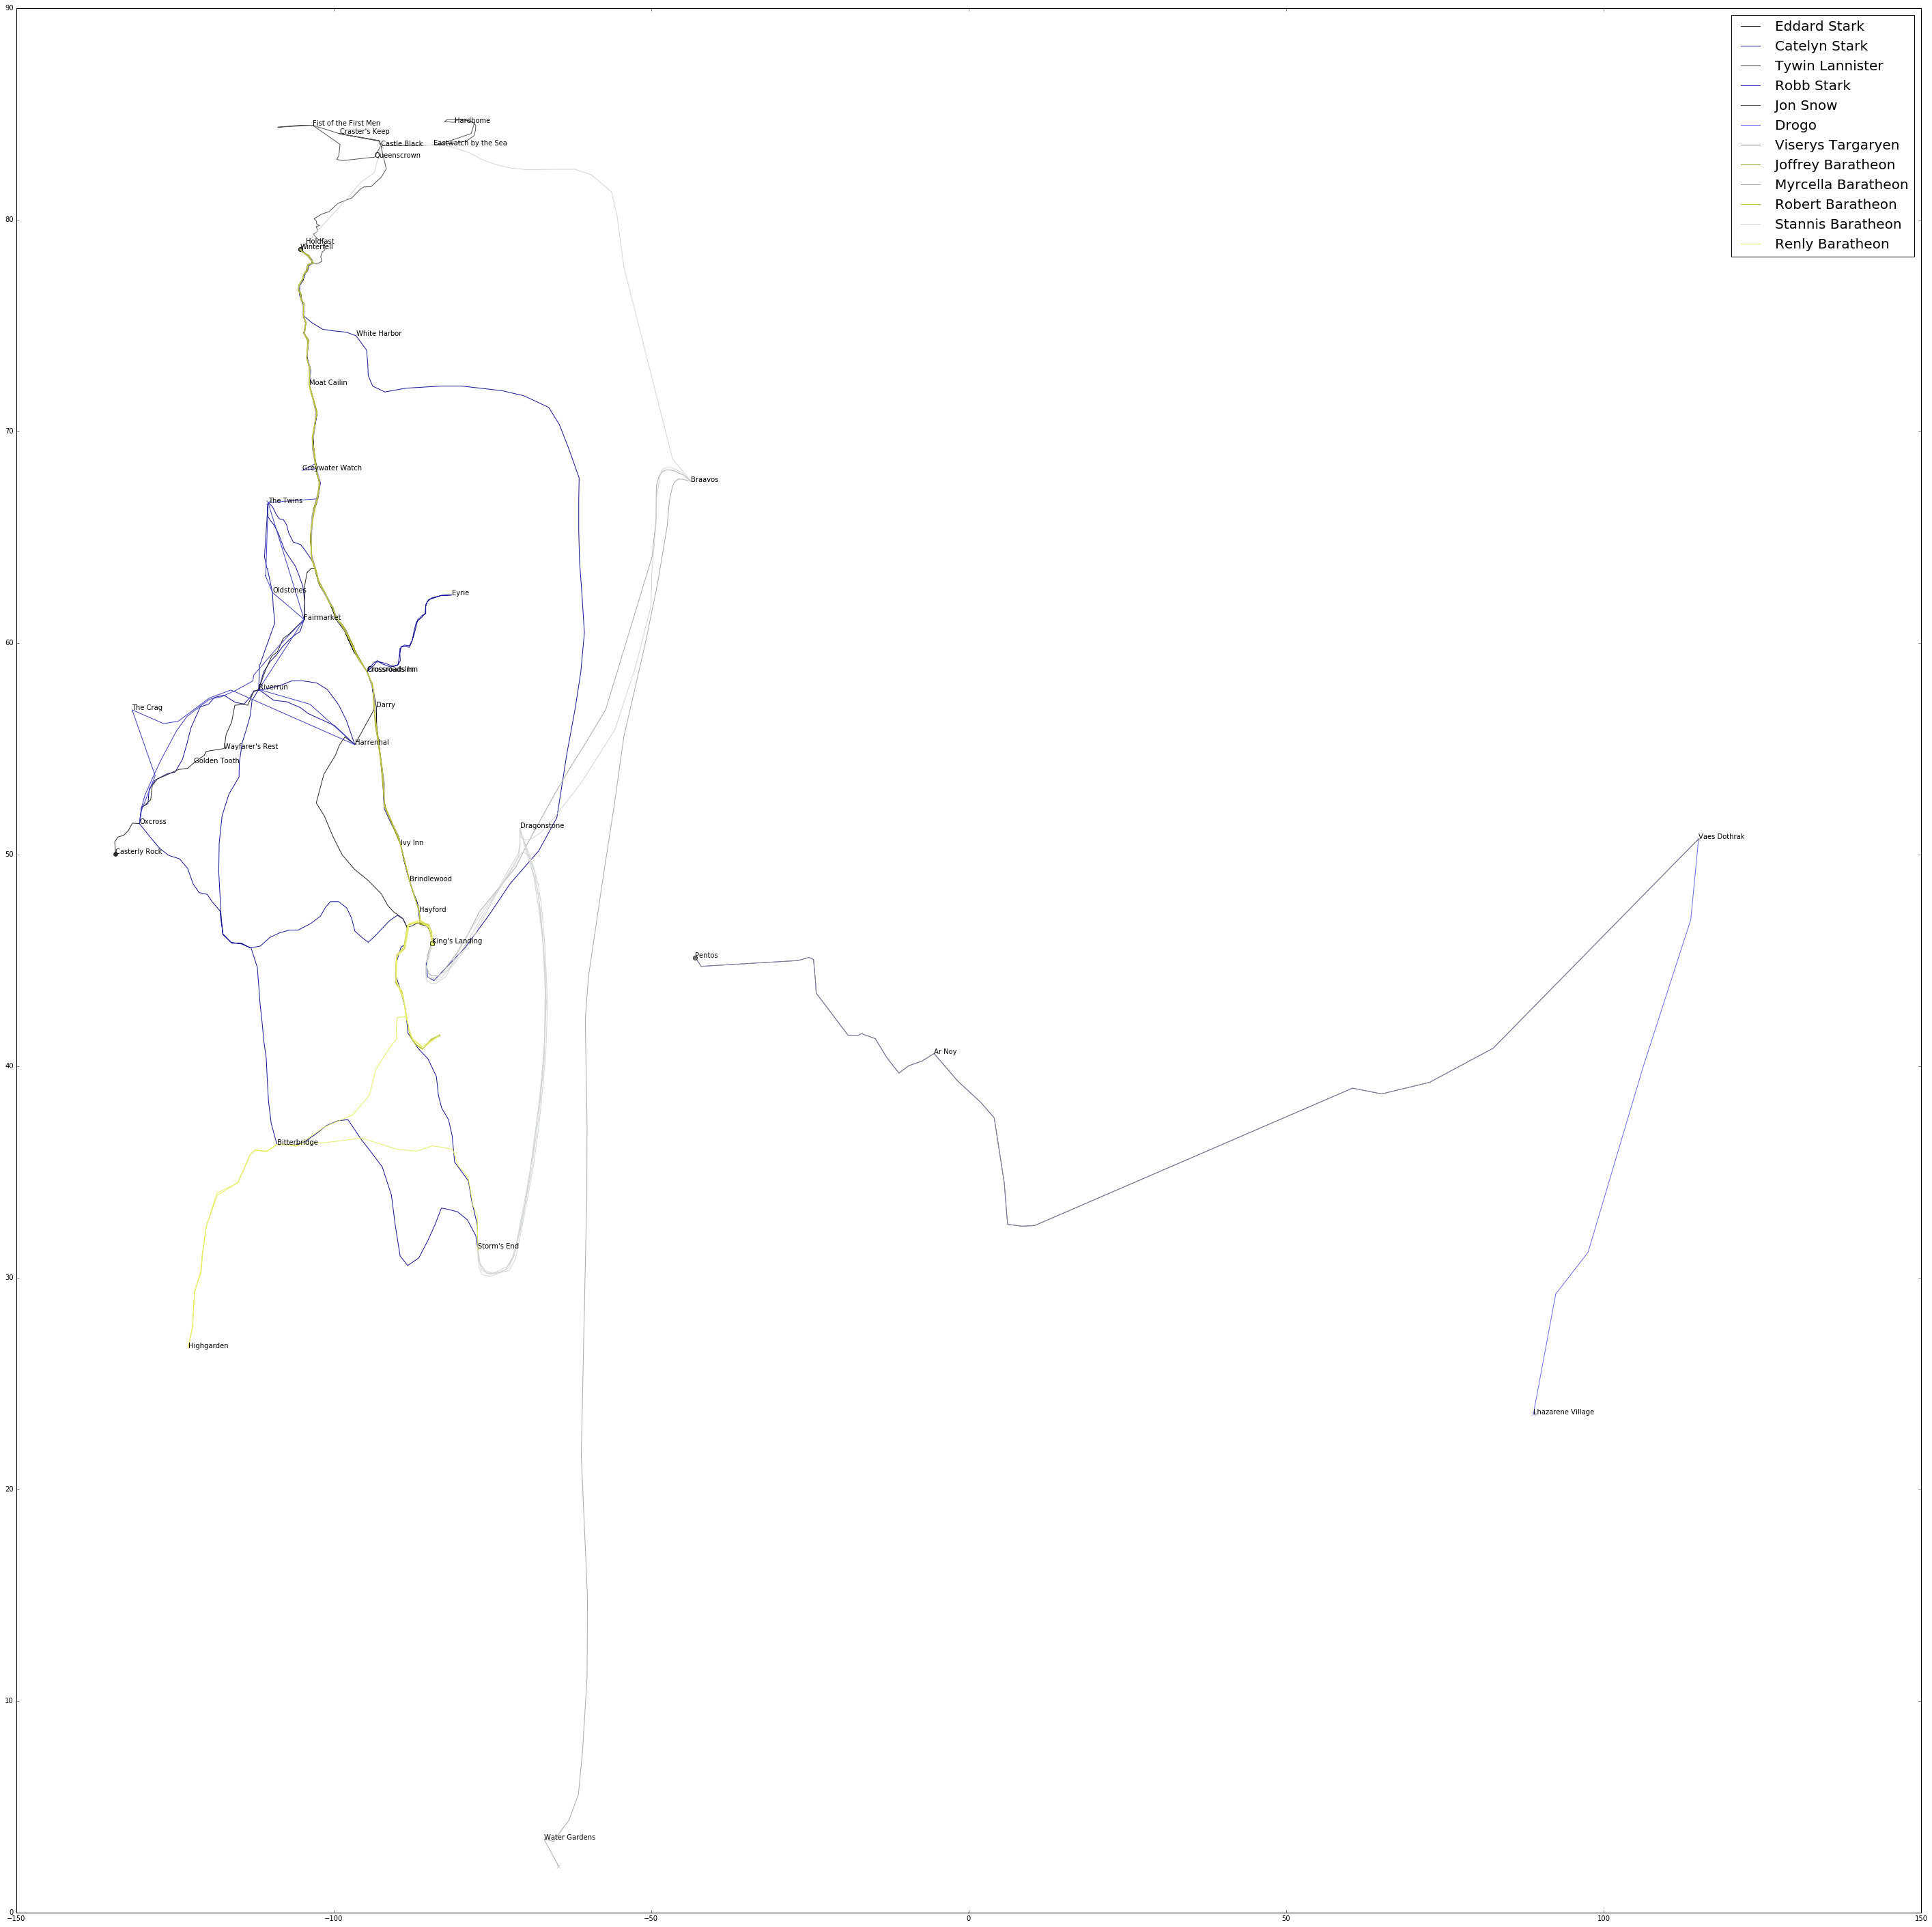

In [171]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
i = 0
cities = {}
plt.figure(figsize=(50,50))

for a in d:
    if a['path'][-1]['alive'] == False:
        for b in a['path']:
            for c in b['path']:
                if len(c) == 3:
                    cities[c[2]] = (c[1], c[0])

for char in d:
    plot = []
    if char['path'][-1]['alive'] == False:
        for a in char['path']:
            for b in a['path']:
                plot.append((b[1], b[0]))
#                 if len(b) == 3 and b[2] not in cities:
#                     cities.append(b[2])
        #c=np.random.rand(3,1)
        plt.plot(*zip(*plot), label=char['name'], color=t[i])
        plt.plot(plot[-1][0], plot[-1][1], 'x', color=t[i])
        plt.plot(plot[0][0], plot[0][1], 'o', color=t[i])
        #plt.text(plot[0][0], plot[0][1], char['name'], color=t[i])
        i += 1
for a in cities:
    plt.text(cities[a][0], cities[a][1], a)
plt.legend(prop={'size':20})
plt.show()
plt.savefig('hat.png')

[78.60937753613514, -105.31330572428169, u'Winterfell']
[78.87133549569842, -104.35496490808343, u'Holdfast']
[78.60937753613514, -105.31330572428169, u'Winterfell']
[78.60937753613514, -105.31330572428169, u'Winterfell']
[78.26209183448897, -104.06745472665963]
[77.95071659611816, -103.18901250924476]
[77.8401938026893, -103.96204166056982]
[77.61614450621268, -104.10259241535623]
[77.33421454748652, -104.80534618928812]
[77.15578831849741, -104.77020850059152]
[76.82356825529133, -105.54323765191658]
[76.6543068480568, -105.57837534061318]
[76.45002022211, -105.15672307625407]
[76.17565758388399, -105.12158538755747]
[75.98973039777916, -104.66479543450174]
[75.47011578713258, -104.77020850059152]
[75.10424752136025, -104.45396930232216]
[74.61793103539632, -104.59452005710853]
[74.23112669048314, -104.06745472665963]
[73.56860837779969, -104.2431431701426]
[72.91005902137822, -103.78635321708686]
[72.91005902137822, -103.78635321708686]
[72.1927801389041, -103.84384980611101, u'Moat

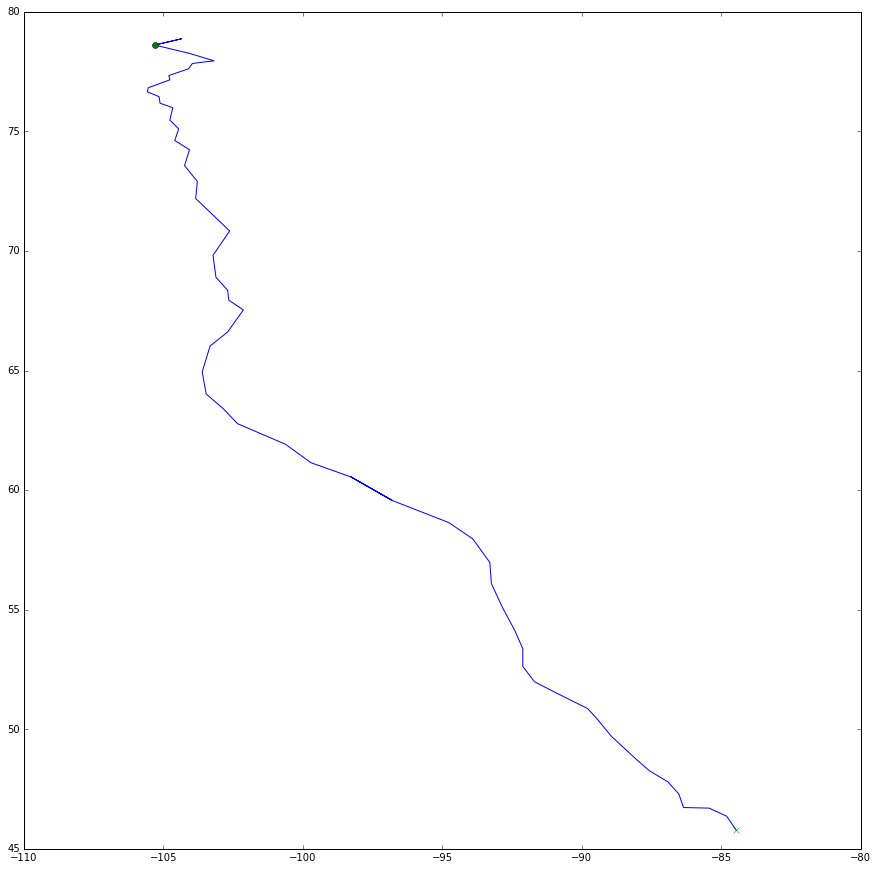

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plot = []
if d[0]['path'][-1]['alive'] == False:
    for a in d[0]['path']:
        for b in a['path']:
            print b
            plot.append((b[1], b[0]))
    plt.plot(*zip(*plot), label=d[0]['name'])
    plt.plot(plot[-1][0], plot[-1][1], 'x')
    plt.plot(plot[0][0], plot[0][1], 'o', color="green")
plt.show()